# Atividade - Teste de hipóteses para média populacional 

## Quando variância populacional é desconhecida

## Aula 22 - Atividade

___

<div id="indice"></div>

## Índice

- [Teste de hipóteses para média populacional com variância populacional desconhecida](#th-var-desconhecida)
    - [Passos para construção de um teste de hipóteses](#passos)
    - [Decisão do teste](#decisao)
        - [Caso Unilateral a Esquerda](#unilateral-esquerda)
        - [Caso Unilateral a Direita](#unilateral-direita)
        - [Caso Bilateral](#bilateral)
    - [Exemplos](#exemplos)
        - [Exemplo 1: Pontuação em um exame de inglês](#exemplo1)
        - [Exemplo 2: Conteúdo de latas de regrigerante](#exemplo2)
- [Base de dados: Precipitação Pluviométrica](#base)
    - [Exercício 1](#ex1)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
- [Estimando o tamanho da amostra](#estimando-n)
    - [Estimativa de $n$ com $\sigma$ conhecido](#n-sigma-conhecido)
        - [Exercício 5](#ex5)
___

In [1]:
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

<div id="th-var-desconhecida"></div>

# Teste de hipóteses para média populacional com variância populacional desconhecida

Quando não conhecemos a variância populacional não é possível realizar o teste de hipóteses utilizando o TLC. Assim, precisamos de uma nova estatística de teste. **Importante**: para esta estatística vamos considerar apenas variáveis de interesse com distribuição **normal**.

Supondo que uma amostra aleatória simples foi coletada da população, podemos utilizar o estimador $S^2$ (variância amostra - calculada a partir de uma amostra) para $\sigma^2$ (variância populacional - desconhecida), obtemos, sob $H_0$, que:

$$t = \frac{\overline{X}-\mu_0}{S/\sqrt{n}}\sim t_{(n-1)}$$

sendo $(n-1)$ os graus de liberdade da distribuição t-Student do teste.

<div id="passos"></div>

## Passos para construção de um teste de hipóteses

1. Fixe qual a hipótese nula, $H_0$, a ser testada e qual a hipótese alternativa ($H_A$).
2. Use a teoria estatística e as informações disponíveis para decidir qual **estatística de teste** será usada sob $H_0$. Não se esqueça de levantar as propriedades dessa estatística.
3. Utilize a estatística para rejeitar, ou não, $H_0$. Para isso temos duas opções:
    1. Via Região Crítica:
        1. **Fixe a probabilidade $\alpha$** de cometer erro de rejeitar $H_0$, sob $H_0$ verdadeiro, e use este valor para **construir a região crítica RC**. Lembre que esta região é construída para a estatística definida no segundo passo, usando o valor hipotetizado em $H_0$.
        2. Use as informações fornecidas pela amostra para encontrar o **valor observado da estatística de teste**. 
        3. Se o **valor observado da estatística de teste pertencer à região crítica, rejeite $H_0$**; caso contrário, não rejeite.
    2. Via valor-p:
        1. Use as informações fornecidas pela amostra para encontrar o **valor observado da estatística de teste**. 
        2. Use o valor observado da *estatística de teste* para **encontrar o valor-p**, ou seja, a probabilidade de encontrar valores tão ou mais desfavoráveis à $H_0$ quanto a *estatística de teste* observada pela amostra. 
        3. Se o **valor-p for menor do que algum $\alpha$ fixado, rejeite $H_0$**; caso contrário, não rejeite.

<div id="decisao"></div>

## Decisão do teste

Vamos considerar a estatística do teste observada (sob $H_0$): $t_{obs} = \frac{\overline{x}_{obs}-\mu_0}{s/\sqrt{n}}$

<div id="unilateral-esquerda"></div>

### Caso Unilateral a Esquerda

No caso em que a hipótese alternativa está exclusivamente à esquerda da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu < \mu_0$$

**Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(\alpha , \text{df}=n-1)$, pois $\alpha = P(erro~I)$ estará na cauda à esquerda. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} < t_c$.

**Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x}_{obs})$ for muito menor que $\mu_0$, ou seja, se $t_{obs}$ for "muito" negativo. Define-se o valor-p em um teste unilateral a esquerda por: $valor\_p = P(t_{(n-1)} < t_{obs} | \mu=\mu_0) = \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

<div id="unilateral-direita"></div>

### Caso Unilateral a Direita

No caso em que a hipótese alternativa está exclusivamente à direita da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu > \mu_0$$

**Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(1-\alpha, \text{df}=n-1)$, pois $\alpha = P(erro~I)$ estará na cauda à direita. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} > t_c$.

**Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x}_{obs})$ for muito maior que $\mu_0$, ou seja, se $t_{obs}$ for "muito" positivo. Define-se o valor-p em um teste unilateral a esquerda por: $valor\_p = P(t_{(n-1)} > t_{obs} | \mu=\mu_0) = 1 - \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

<div id="bilateral"></div>

### Caso Bilateral

No caso em que a hipótese alternativa é diferente da média, ou seja,

$$H_0: \mu = \mu_0$$
$$H_A: \mu \neq \mu_0$$

**Via Região Crítica**: Obtemos o valor crítico como: $t_c = \text{stats.t.ppf}(1-\alpha/2, df=n-1)$, pois temos $\alpha/2$ em cada cauda. Assim, rejeitamos $H_0$, ao nível de significância $\alpha$, se $t_{obs} < -t_c$ ou $t_{obs} > t_c$.

**Via valor-p**: É razoável rejeitar $H_0$ se a média amostral observada $(\overline{x}_{obs})$ for muito menor ou muito maior que $\mu_0$, ou seja, se $t_{obs}$ for "muito" negativo ou "muito" positivo. Define-se o valor-p em um teste bilateral por: $valor\_p = 2p'$, onde

1. Se $\overline{x}_{obs} < \mu_0$: $p' = P(t_{(n-1)} < t_{obs} | \mu=\mu_0) = \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.
2. Se $\overline{x}_{obs} > \mu_0$: $p' = P(t_{(n-1)} > t_{obs} | \mu=\mu_0) = 1 - \text{stats.t.cdf}(t_{obs}, \text{df}=n-1)$.

**Teoria/Geral**
  * erro tipo I: rejeitar $H_0$ quando $H_0$ é verdadeira
  * erro tipo II: não rejeitar $H_0$ quando $H_0$ é falsa (ou dizer, rejeitar $H_A$ quando $H_A$ é verdadeira)

<div id="exemplos"></div>

## Exemplos

Vamos apresentar dois exemplos de teste de hipótese para média populacional com variância desconhecida.

___

<div id="exemplo1"></div>

## Exemplo 1: Pontuação em um exame de inglês

O número médio de pontos em um exame de inglês tem sido historicamente igual a 80. Foram sorteados 10 estudantes que fizeram recentemente esse exame e observadas as notas: 65, 70, 76, 86, 59, 81, 75, 72, 81, 83.

Especialistas desconfiam que o rendimento médio dos alunos diminuiu e desejam testar essa afirmação por meio de um teste de hipóteses, com nível de significância de 5%. Fazendo as suposições necessárias, qual seria a conclusão do teste?

### Definição da variável de interesse

$X$: número de pontos que um estudante tira em um exame de inglês.

Aqui, $E(X)=\mu \mbox{ e } Var(X)=\sigma^2$, 
sendo ambos desconhecidos pelo contexto do problema!

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Desconfiança não procede $\Rightarrow H_0: \mu=80$

$H_1:$ Desconfiança procede que rendimento médio caiu $\Rightarrow H_1: \mu<80$

### Inicializando os parâmetros

In [2]:
#Dados
amostra=(65,70,76,86,59,81,75,72,81,83)

n=len(amostra)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
x_obs=np.mean(amostra)
s=np.std(amostra, ddof=1)

print("Tamanho da amostral: n={}".format(n))
print("Média amostral observada: x_obs={}".format(x_obs))
print("Desvio padrão amostral observada: s={}".format(s))

Tamanho da amostral: n=10
Média amostral observada: x_obs=74.8
Desvio padrão amostral observada: s=8.482662055955993


In [3]:
𝛼=0.05 #nível de significância fixado para o teste
μ0=80 #sob a hipótese nula

### Decisão via Região Crítica: UNICAUDAL a esquerda

#### Usando t_critico

In [4]:
#Decisão Via Região Crítica: UNICAUDAL a esquerda
t_obs=(x_obs-μ0)/(s/np.sqrt(n))

t_c=stats.t.ppf(𝛼, df=n-1) #valor crítico na cauda a esquerda

print("t_obs={}".format(t_obs))
print("t_c={}".format(t_c))

print("\nRegra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!!\n")
print("RC={{t_obs<({})}}\n".format(t_c))
print("Conclusão: Como t_obs pertence a RC, então há evidências de que desconfiança procede, com 95% de confiança!!")


t_obs=-1.9385239827313108
t_c=-1.8331129326536337

Regra geral: Rejeitamos a hipótese nula H0 se t_obs pertencer a Região Crítica (RC)!!

RC={t_obs<(-1.8331129326536337)}

Conclusão: Como t_obs pertence a RC, então há evidências de que desconfiança procede, com 95% de confiança!!


#### Usando x_critico

In [5]:
# Se quisermos descobrir qual é o x_critico ao invés do t_critico...
x_c = t.ppf(𝛼, loc=μ0, scale=s/sqrt(n), df=n-1)

print("x_obs={}".format(x_obs))
print("x_c={}".format(x_c))

print("\nRegra geral: Rejeitamos a hipótese nula H0 se x_obs pertencer a Região Crítica (RC)!!\n")
print("RC={{x_obs<({})}}\n".format(x_c))
print("Conclusão: Como x_obs pertence a RC, então há evidências de que desconfiança procede, com 95% de confiança!!")

x_obs=74.8
x_c=75.08276021616798

Regra geral: Rejeitamos a hipótese nula H0 se x_obs pertencer a Região Crítica (RC)!!

RC={x_obs<(75.08276021616798)}

Conclusão: Como x_obs pertence a RC, então há evidências de que desconfiança procede, com 95% de confiança!!


### Decisão via Valor-p: UNICAUDAL a esquerda

In [6]:
#Decisão Via Valor-p: UNICAUDAL a esquerda
t_obs=(x_obs-μ0)/(s/np.sqrt(n))

valor_p=stats.t.cdf(t_obs, df=n-1) 

print("𝛼={}".format(𝛼))
print("Valor-p={}".format(valor_p))

print("\nRegra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!!\n")

print("Conclusão: Como nos resultados acima vemos que valor-p < 𝛼, então há evidências de que desconfiança procede, com 95% de confiança!!")



𝛼=0.05
Valor-p=0.042254614967800266

Regra geral: Rejeitamos a hipótese nula H0 se valor-p < 𝛼!!

Conclusão: Como nos resultados acima vemos que valor-p < 𝛼, então há evidências de que desconfiança procede, com 95% de confiança!!


___

<div id="exemplo2"></div>

## Exemplo 2: Conteúdo de latas de regrigerante

As latas de certa marca de refrigerante apresentam em seu rótulo o volume de 350 ml. O fabricante deseja testar se o conteúdo médio das latas é igual a 350 ml, como anunciado no rótulo. Isto equivale a verificar se a máquina está regulada para colocar 350 ml, ou não, nas latas. 

Para averiguar a afirmação do fabricante, foi coletada uma amostra de 36 latas do refrigerante em pontos de comercialização e mediu-se o conteúdo destas latas. Os resultados obtidos na amostra foram: $\overline{x} = 347~\text{ml}$ e $s = 10,5~\text{ml}$

Será que as latas contêm 350 ml de líquido com 95% de confiança?

### Definição da variável de interesse

$X$: quantidade de refrigerante dentro de uma lata.

Aqui, $E(X)=\mu \mbox{ e } Var(X)=\sigma^2$, 
sendo ambos desconhecidos pelo contexto do problema!

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Máquina está regulada $\Rightarrow H_0: \mu=350$

$H_1:$ Máquina não está regulada $\Rightarrow H_1: \mu\neq350$

### Inicializando os parâmetros

In [7]:
#Dados
n=36                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
x_obs=347
s=10.5

print("Tamanho da amostral: n={}".format(n))
print("Média amostral observada: x_obs={}".format(x_obs))
print("Desvio padrão amostral observada: s={}".format(s))

Tamanho da amostral: n=36
Média amostral observada: x_obs=347
Desvio padrão amostral observada: s=10.5


In [15]:
alpha=0.05 #nível de significância fixado para o teste
μ0=350 #sob a hipótese nula

### Decisão via Região Crítica: BICAUDAL

In [21]:
t_obs=(x_obs-μ0)/(s/np.sqrt(n))
t_c = stats.t.ppf(1-alpha/2 , df=n-1)

print(f"T_obs < -t_c => {t_obs}<{-t_c}")
print(f"T_obs > t_c => {t_obs}>{t_c}")
print("Portanto, H0 válida")

T_obs < -t_c => -1.7142857142857142<-2.0301079282503425
T_obs > t_c => -1.7142857142857142>2.0301079282503425
Portanto, H0 válida


### Decisão via Valor-p: BICAUDAL

In [27]:
p_linha = stats.t.cdf(t_obs,df=n-1)
valor_p = 2*p_linha
print(f"Valor P < alpha => {valor_p}<{alpha}")
print("Portanto, H0 válida")

Valor P < alpha => 0.09532031737183971<0.05
Portanto, H0 válida


___

<div id="base"></div>

## Base de dados: Precipitação Pluviométrica

Montgomery – Adaptado do Exercício 9-34

Semear nuvens tem sido estudado durante muitas décadas como um procedimento de mudança do tempo (veja referência da pesquisa no livro). Algumas nuvens foram selecionadas aleatoriamente e semeadas com nitrato de prata. A precipitação pluviométrica, em acre-pé, foi medida e registrada no arquivo `precipitacao.csv`.

Suspeita-se que a precipitação média das nuvens semeadas excede 25 acres-pés.

In [28]:
# Carregando os dados
dados = pd.read_csv('precipitacao.csv', header=None)
dados.columns = ['precipitacao']
precipitacao = dados['precipitacao']
dados.head()

,precipitacao
0,18.0
1,30.7
2,19.8
3,27.1
4,22.3


<div id="ex1"></div>

### EXERCÍCIO 1

Formule as hipóteses em termos do problema e em termos do parâmetro.

In [30]:
# H0 = 25
# HA > 25

<div id="ex2"></div>

### EXERCÍCIO 2

Interprete os erros do tipo I e II relacionados ao teste acima, em termos do problema em questão. 

In [29]:
# erro tipo I: assumir que a precipitação excede 25 acres-pé, enquanto isso não ocorre
# erro tipo II: assumir que a precipitação não excede 25 acres-pé, enquanto excede

<div id="ex3"></div>

### EXERCÍCIO 3

Verifique se a afirmação procede, considerando nível de significância de 1%. Tome a decisão via região crítica e valor-p.

*Valores de referência para a resposta: t_obs=0.9673747735077124, RC={t_obs< 2.539483190622288} e Valor-p=0.1727550662376527*

In [40]:
alpha = 0.01
n = len(precipitacao)
mu=25
x_obs=precipitacao.mean()
s=precipitacao.std()
t_obs=(x_obs-mu)/(s/np.sqrt(n))

# Região Crítica
# Obtemos o valor crítico como:  𝑡𝑐=stats.t.ppf(1−𝛼,df=𝑛−1) , pois  𝛼=𝑃(𝑒𝑟𝑟𝑜 𝐼)  estará na cauda à direita. Assim, rejeitamos  𝐻0 , ao nível de significância  𝛼 , se  𝑡𝑜𝑏𝑠>𝑡𝑐 .
tc = stats.t.ppf(1-alpha, df=n-1)
print(f"T_obs > tc => {t_obs}>{tc}")
print("H0 é válida")

T_obs > tc => 0.9673747735077124>2.539483190622288
H0 é válida


In [42]:
# Valor-p
# Define-se o valor-p em um teste unilateral a esquerda por:  𝑣𝑎𝑙𝑜𝑟_𝑝=𝑃(𝑡(𝑛−1)>𝑡𝑜𝑏𝑠|𝜇=𝜇0)=1−stats.t.cdf(𝑡𝑜𝑏𝑠,df=𝑛−1) .
valor_p = 1-stats.t.cdf(t_obs, df=n-1)
print(f"Valor P < alpha => {valor_p}<{alpha}")
print("Portanto, H0 válida")

Valor P < alpha => 0.1727550662376527<0.01
Portanto, H0 válida


<div id="ex4"></div>

### EXERCÍCIO 4

Verifique se a precipitação é normalmente distribuída. Lembre-se que só podemos realizar o teste do [exercício 3](#ex3) se a precipitação seguir uma distribuição normal. **Dica**: use `probplot`.

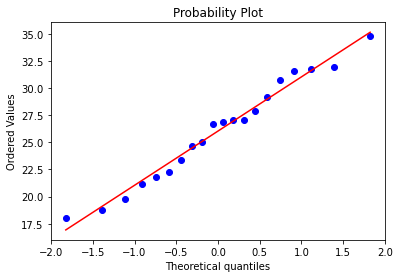

In [44]:
stats.probplot(precipitacao, plot=plt)
plt.show()

<div id="estimando-n"></div>

# Estimando o tamanho da amostra

Vamos aprender a estimar um tamanho da amostra com limite para o erro máximo da amostra com probabilidade $\gamma$. Lembrando que $\gamma$ é o complemento do nível de significância, ou seja, $\gamma = 1 - \alpha$.

<div id="n-sigma-conhecido"></div>

## Estimativa de $n$ com $\sigma$ conhecido

Passo 1: Precisamos encontrar na normal padrão o valor de $z_{\gamma/2}$ que faz com que a probabilidade $\gamma$ esteja cercando a origem. Utilize a simulação a seguir para encontrar o valor de $z_{\gamma/2}$ para $\gamma = 95\%$. 

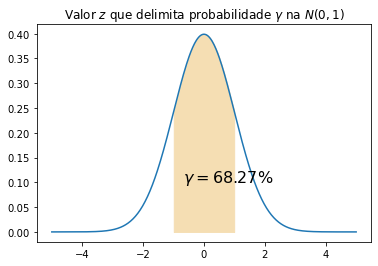

In [45]:
zγ2 = 0
prob = 0.9
x = np.linspace(-5, 5, 500)
y = norm.pdf(x)

#Função que utiliza o pywidget
@interact(z = (1.0, 2.6, 0.02))
def f(z=0.2):
    global zγ2
    global prob
    plt.plot(x,y)
    plt.fill_between(x,y,where=(x>-z)&(x<z), color="wheat")
    cdfs = norm.cdf([-z,z])
    area = cdfs[1]-cdfs[0]
    plt.text(-0.7, 0.25*norm.pdf(0), "$\gamma={:.2f}\%$".format(area*100), fontsize=16)
    plt.title("Valor $z$ que delimita probabilidade $\gamma$ na $N(0,1)$")
    zγ2 = z
    prob = area

In [46]:
print('z(𝛾/2)={} com gamma={}'.format(zγ2, prob))

z(𝛾/2)=1.0 com gamma=0.6826894921370859


Você também pode obter esse valor utilizando `stats.norm.ppf`, sem a necessidade de interação:

In [48]:
print('Calculando diretamente')
gamma = 0.95
alpha = 1 - gamma
z_gamma2 = stats.norm.ppf(1 - alpha / 2)  # Não precisa de loc e scale porque Z é a normal padrão
print('z(𝛾/2)={} com gamma={}'.format(z_gamma2, gamma))

Calculando diretamente
z(𝛾/2)=1.959963984540054 com gamma=0.95


Agora, com o $z_{\gamma/2}$ encontrado acima, vamos encontrar $n$ tal que este valor seja menor que uma certa tolerância dada por parâmetros do problema. Suponha que gostaríamos de estimar uma amostra que em `prob` $\%$ das vezes está a uma distância máxima $d$ da média amostral (essa distância $\varepsilon$ deve ser definida por quem está conduzindo a análise, assim como o $\gamma$). 

Precisamos então projetar uma curva normal estreita o suficiente. Para isso, o valor $d$ precisa corresponder ao $z_{\gamma/2}$ encontrado acima.

Para este exemplo vamos utilizar o exemplo dos resistores. Vamos supor que $\sigma=50\Omega$. Qual o tamanho $n$ da amostra precisaríamos ter para que em $95\%$ das vezes estivéssemos a uma distância de no máximo $\varepsilon=20\Omega$ da média populacional $\mu$?

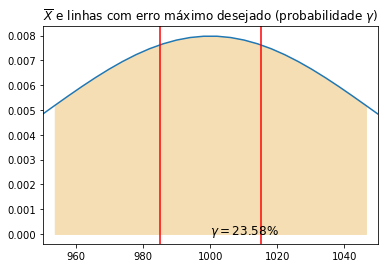

In [49]:
σ = 50
𝜀 = 20

#Função que utiliza o pywidget
@interact(n = (1, 80, 1), mu=(950, 1050, 2), 𝜀 = (10, 40, 2))
def funcao_Xbar(n=1, mu=1000, 𝜀=15):
    plt.xlim(mu-50, mu+50)
    d_amostral = σ/sqrt(n)
    x_amostral = np.linspace(mu - 4*d_amostral, mu+4*d_amostral, 100)
    y_X = norm.pdf(x_amostral, loc=mu, scale=d_amostral)
    plt.plot(x_amostral, y_X)
    plt.axvline(mu + 𝜀, color="red")
    plt.axvline(mu - 𝜀, color="red")
    x_equiv = zγ2*d_amostral
    cdfs = norm.cdf([mu-𝜀,mu+𝜀], loc=mu, scale=d_amostral)
    area = cdfs[1]-cdfs[0]
    plt.fill_between(x_amostral, y_X, where=((x_amostral >= (mu - x_equiv))&(x_amostral <= (mu + x_equiv)) ), color="wheat")
    plt.text(mu, 0.5*norm.pdf(mu), "$\gamma={:.2f}\%$".format(area*100), fontsize=12)
    plt.title("$\overline{X}$ e linhas com erro máximo desejado (probabilidade $\gamma$)")

Note, no exemplo acima, que a média $\mu$ específica não importa. O tamanho da amostra determina a variância da distribuição amostral, e a probabilidade será $\gamma$ de conter o valor da média qualquer que seja ela.

Baseado nas propriedades de variáveis aleatórias, isso pode ser representado da seguinte forma:

$N(\mu, \sigma^2) = \mu + N(0, \sigma^2)$

### Resumindo

Os passos para encontrar um tamanho de amostra $n$ que contenha a média com erro máximo $d$ e probabilidade $\gamma$ são:

Encontrar $z_{\gamma/2}$ na normal padrão $Z \sim N(0,1)$

Vamos usar a fórmula de padronização na normal de $\overline{X}$: $z_{\gamma/2} = \frac{\overline{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

Lembremos que estamos interessados numa distância em relação à média populacional $\mu$, ou seja:

$\varepsilon = \overline{x} - \mu$

Temos então:

$z_{\gamma/2} = \frac{\varepsilon}{\frac{\sigma}{\sqrt{n}}}$


Isolando o $n$, encontramos:

$n = ( z_{\gamma/2}\frac{\sigma}{\varepsilon} )^2$

Utilizando a fórmula acima devemos obter o mesmo valor (ou próximo) encontrado na versão interativa.

In [50]:
n = (z_gamma2 * σ / 𝜀)**2
print("n={}".format(n))
print("Mas n deve ser um número inteiro, então: n={}".format(ceil(n)))

n=24.009117629338277
Mas n deve ser um número inteiro, então: n=25


<div id="ex5"></div>

### EXERCÍCIO 5

Uma fábrica de mantas de chumbo para proteção em radiografias precisa garantir que suas mantas têm uma certa espessura. Sabe-se que o desvio padrão é de $0.6mm$.

Qual o tamanho da amostra é preciso ter para garantir que a média amostral $\overline{x}$ esteja a uma distância máxima de $0.2mm$ da média $\mu$? Considere 0,1% de significância.

*Valores de referência para a resposta: z=3.2905267314918945, n=98*

In [56]:
std = 0.6
e = 0.2
alpha = 0.001
z_gamma2 = stats.norm.ppf(1 - alpha / 2)
n = (z_gamma2*std/e)**2
print(z_gamma2)
print(n)

3.2905267314919255
97.44809553596639
